# Simple exploration of the Google Landmark Recognition Dataset

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# opening train/test csv files
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head(5)

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [4]:
# 10 for 1 ration
print(f"Train shape : {train.shape}")
print(f"Test shape : {test.shape}")

Train shape : (1225029, 3)
Test shape : (117703, 2)


In [5]:
# Dataset organization
train.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

# Class distribution

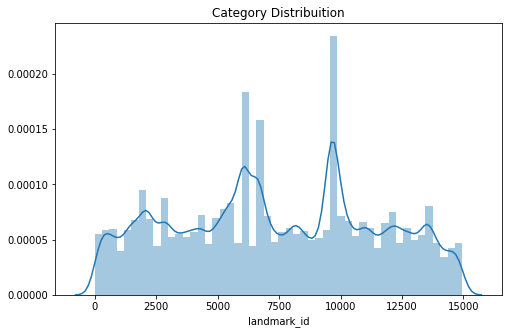

In [6]:
plt.figure(figsize = (8, 5))
plt.title('Category Distribuition')
sns.distplot(train['landmark_id'])

plt.show()

In [8]:
# Top categories
print(train['landmark_id'].value_counts().head(7))

print ('-------------------------------------------')
# Bottom categories
print(train['landmark_id'].value_counts().tail(7))

9633    50337
6051    50148
6599    23415
9779    18471
2061    13271
5554    11147
6651     9508
Name: landmark_id, dtype: int64
-------------------------------------------
6261    1
4144    1
1527    1
6025    1
4334    1
5865    1
8381    1
Name: landmark_id, dtype: int64


In [9]:
print(f"Median number : {train['landmark_id'].value_counts().median()}")
print(f"Mean number : {train['landmark_id'].value_counts().mean()}")

Median number : 14.0
Mean number : 81.93625844425122


In [10]:
# More exhaustive description
train['landmark_id'].value_counts().describe()

count    14951.000000
mean        81.936258
std        707.234873
min          1.000000
25%          6.000000
50%         14.000000
75%         46.000000
max      50337.000000
Name: landmark_id, dtype: float64

In [11]:
f"Number of classes under 10 occurences : {(train['landmark_id'].value_counts() <= 10).sum()}/{len(train['landmark_id'].unique())}"

'Number of classes under 10 occurences : 6559/14951'

So we have 14951 categories, 75% of them having less than 46 examples. An imbalanced fun

# Plotting examples for the most represented class : 
Let's look at some images and see how they differ :

## St. Peter's Basilica

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

category = train['landmark_id'].value_counts().keys()[0]
urls = train[train['landmark_id'] == category]['url']
display_category(urls, "")
    


##  The Colosseum

In [13]:
category = train['landmark_id'].value_counts().keys()[1]
urls = train[train['landmark_id'] == category]['url']
display_category(urls, "")

## Some place I should know...

In [14]:
category = train['landmark_id'].value_counts().keys()[2]
urls = train[train['landmark_id'] == category]['url']
display_category(urls, "")

Not much more to do at the moment, other than url analysis, as the dataset has to be downloaded and is not available on kaggle.